In [28]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import csv
import matplotlib.pyplot as plt

# keras imports
import keras
from keras import backend as K
backend_keras = keras.backend.backend()
print("keras is using", backend_keras,"as the backend")

# import a whole bunch of other packeges
import matplotlib
matplotlib.use("Agg")

from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import keras
import pickle
import cv2
import os

keras is using tensorflow as the backend


In [66]:
def show_image(arr):
    two_d = (np.reshape(arr, (28,28))*255).astype(np.uint8)
    plt.imshow(two_d, cmap='Greys', interpolation='nearest')
    plt.show()

train_images = np.load("train_images.npy")


Transform and normalize images??

In [47]:
# load the training labels into a dictionary,
# also load it into a list, haven't decided which one is better yet
labels_dic = {}
labels = []
with open('train_labels.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        try: 
            labels_dic[int(row[0])] = int(row[1])
            labels.append(int(row[1]))
        except: print(row)
            
len(labels_dic)

['ID', 'label']


50000

In [57]:
# normalize images
train_images = np.array(train_images, dtype="float") / 255.0

labels = np.array(labels)
train_labels = []
for i in labels:
    label = np.zeros(10)
    label[i]=1
    train_labels.append(label)

train_labels = np.array(train_labels)

In [33]:
print(labels.shape,train_images.shape)

(50000,) (50000, 28, 28)


In [48]:
# flatten and train
train_images_flatten = np.array([i.flatten("C") for i in train_images])
train_images_flatten.shape

(50000, 784)

## Creating keras model

following this guid
https://medium.com/@pallawi.ds/ai-starter-train-and-test-your-first-neural-network-classifier-in-keras-from-scratch-b6a5f3b3ebc4

In [34]:
# define the 784-256-10 architecture using keras
model = Sequential()
# we construct our nn architecture - a feedforward nn

# our input layer has 28 x 28 x 1 = 784 raw pixels
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

print("printing summary of model")
model.summary()

printing summary of model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### Compile the model

You can compile a network (model) as many times as you want. You need to compile the model if you wish to change the loss function, optimizer or matrices.

You need a compiled model to train (because training uses the loss function and the optimizer). But it’s not necessary to compile the model when testing the model on a new data.

In [60]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS = 75

# compile the model using SGD as our optimizer and categorical
# cross-entropy loss (if you only have two classes use binary =_crossentropy)

print("[INFO] training network...")
opt = SGD(lr=INIT_LR) # stochastic gradient descent
model.compile(loss="categorical_crossentropy", optimizer=opt, 
              metrics=["accuracy"])



[INFO] training network...


In [61]:
# split the train into a train and valid set
ratio = 0.8
cut = int(ratio*len(train_images_flatten))
trainX = train_images_flatten[:cut]
trainY = train_labels[:cut]
valX = train_images_flatten[cut:]
valY = train_labels[cut:]

In [62]:
# train the neural network
H = model.fit(trainX, trainY, 
              validation_data=(valX, valY), 
              epochs=EPOCHS, batch_size=32)

Train on 40000 samples, validate on 10000 samples
Epoch 1/75
40000/40000 [==============================] - 3s 78us/step - loss: 0.6358 - accuracy: 0.7696 - val_loss: 0.6464 - val_accuracy: 0.7588
Epoch 2/75
40000/40000 [==============================] - 3s 73us/step - loss: 0.6294 - accuracy: 0.7738 - val_loss: 0.6382 - val_accuracy: 0.7614
Epoch 3/75
40000/40000 [==============================] - 3s 72us/step - loss: 0.6241 - accuracy: 0.7751 - val_loss: 0.6358 - val_accuracy: 0.7643
Epoch 4/75
40000/40000 [==============================] - 3s 73us/step - loss: 0.6183 - accuracy: 0.7772 - val_loss: 0.6300 - val_accuracy: 0.7684
Epoch 5/75
40000/40000 [==============================] - 3s 74us/step - loss: 0.6132 - accuracy: 0.7793 - val_loss: 0.6248 - val_accuracy: 0.7668
Epoch 6/75
40000/40000 [==============================] - 3s 86us/step - loss: 0.6088 - accuracy: 0.7816 - val_loss: 0.6288 - val_accuracy: 0.7644
Epoch 7/75
40000/40000 [==============================] - 3s 85us/st

Epoch 56/75
40000/40000 [==============================] - 4s 89us/step - loss: 0.5167 - accuracy: 0.8145 - val_loss: 0.5540 - val_accuracy: 0.7955
Epoch 57/75
40000/40000 [==============================] - 4s 88us/step - loss: 0.5163 - accuracy: 0.8148 - val_loss: 0.5507 - val_accuracy: 0.7962
Epoch 58/75
40000/40000 [==============================] - 4s 88us/step - loss: 0.5151 - accuracy: 0.8150 - val_loss: 0.5552 - val_accuracy: 0.7937
Epoch 59/75
40000/40000 [==============================] - 4s 89us/step - loss: 0.5140 - accuracy: 0.8161 - val_loss: 0.5602 - val_accuracy: 0.7923
Epoch 60/75
40000/40000 [==============================] - 4s 89us/step - loss: 0.5140 - accuracy: 0.8162 - val_loss: 0.5484 - val_accuracy: 0.7978
Epoch 61/75
40000/40000 [==============================] - 4s 93us/step - loss: 0.5121 - accuracy: 0.8175 - val_loss: 0.5493 - val_accuracy: 0.7951
Epoch 62/75
40000/40000 [==============================] - 4s 92us/step - loss: 0.5117 - accuracy: 0.8168 - val_

[INFO] evaluating network...


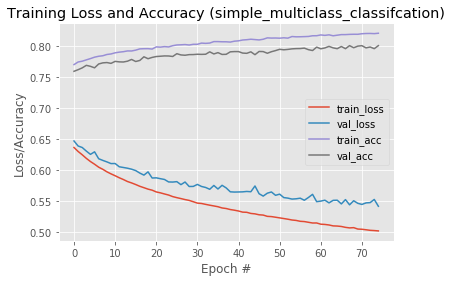

In [75]:
#evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(trainX, batch_size=32)

#Uncomment to see the predicted probabilty for each class in every test image
# print ("predictions---------------->",predictions)
#Uncomment to print the predicted labels in each image
# print("predictions.argmax(axis=1)",predictions.argmax(axis=1))

### print the performance report of the prediction
#print(classification_report(valY.argmax(axis=1),
 #                           predictions.argmax(axis=1), 
  #                          target_names=[str(i) for i in range(10)]))

# plot the training loss and accuracy for each epoch
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (simple_multiclass_classifcation)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("training_performance.png")

## save the model

In [81]:
# save the model to disk
print("[INFO] serializing network and label binarizer...")
model.save("keras_single_hidden_layer_784_256_10_model.model")


[INFO] serializing network and label binarizer...


In [76]:
28*28

784